In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os

In [23]:
df = pd.read_excel('Loss functions.xlsx')

In [33]:
# Metrics to include in the bar chart
metrics = [
    "Val_accuracy", "Val_dice_score", "Val_specificity",
    "Val_sensitivity", "Val_precision", "Val_MAE"
]

In [34]:
def matrix_visualization(matrix):
    # Get the top 5 by Val_accuracy
    top_df = df.sort_values(matrix, ascending=False).head(10)

    # Set figure size
    plt.figure(figsize=(12, 6))

    # Bar setup
    x = np.arange(len(top_df["Loss Functions"]))
    bar_width = 0.12

    # Plot each metric as a group of bars
    for i, metric in enumerate(metrics):
        plt.bar(x + i * bar_width, top_df[metric], width=bar_width, label=metric)

    # Labeling
    plt.xticks(x + (bar_width * len(metrics)) / 2, top_df["Loss Functions"], rotation=45)
    plt.ylabel("Value")
    plt.title(f"Top 5 Loss Functions by {matrix}")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

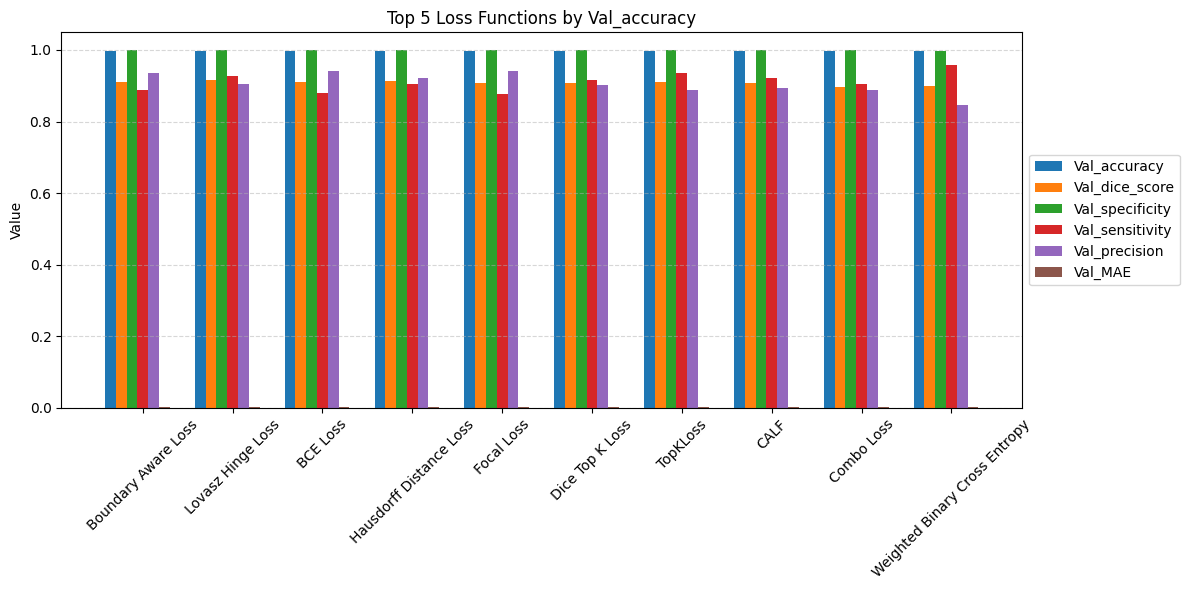

In [35]:
matrix_visualization("Val_accuracy")

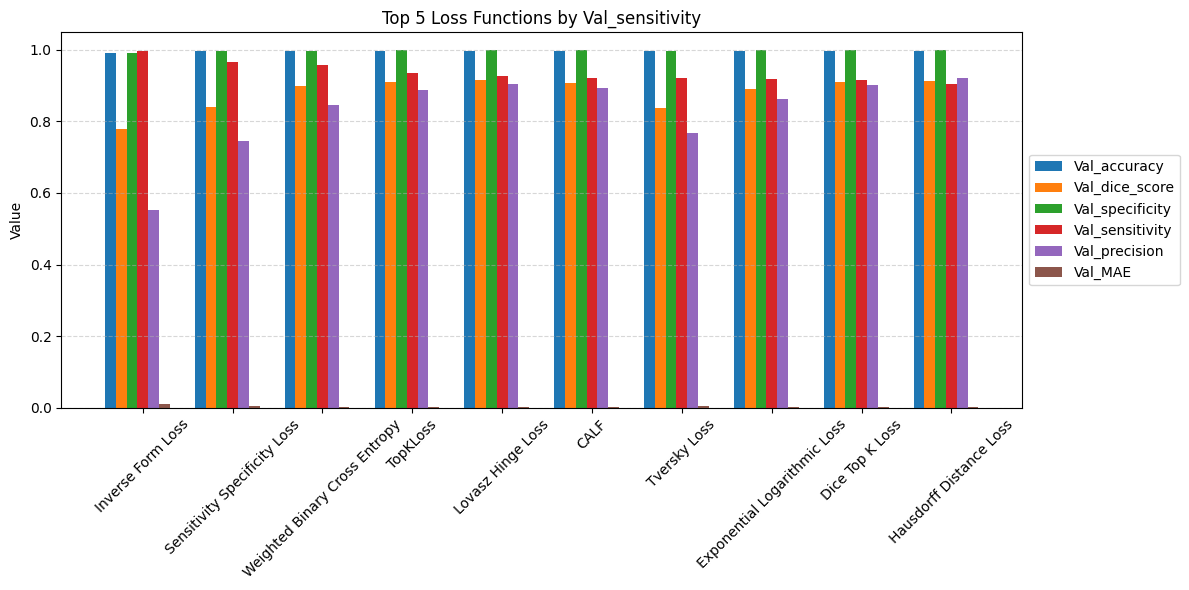

In [37]:
matrix_visualization("Val_sensitivity")

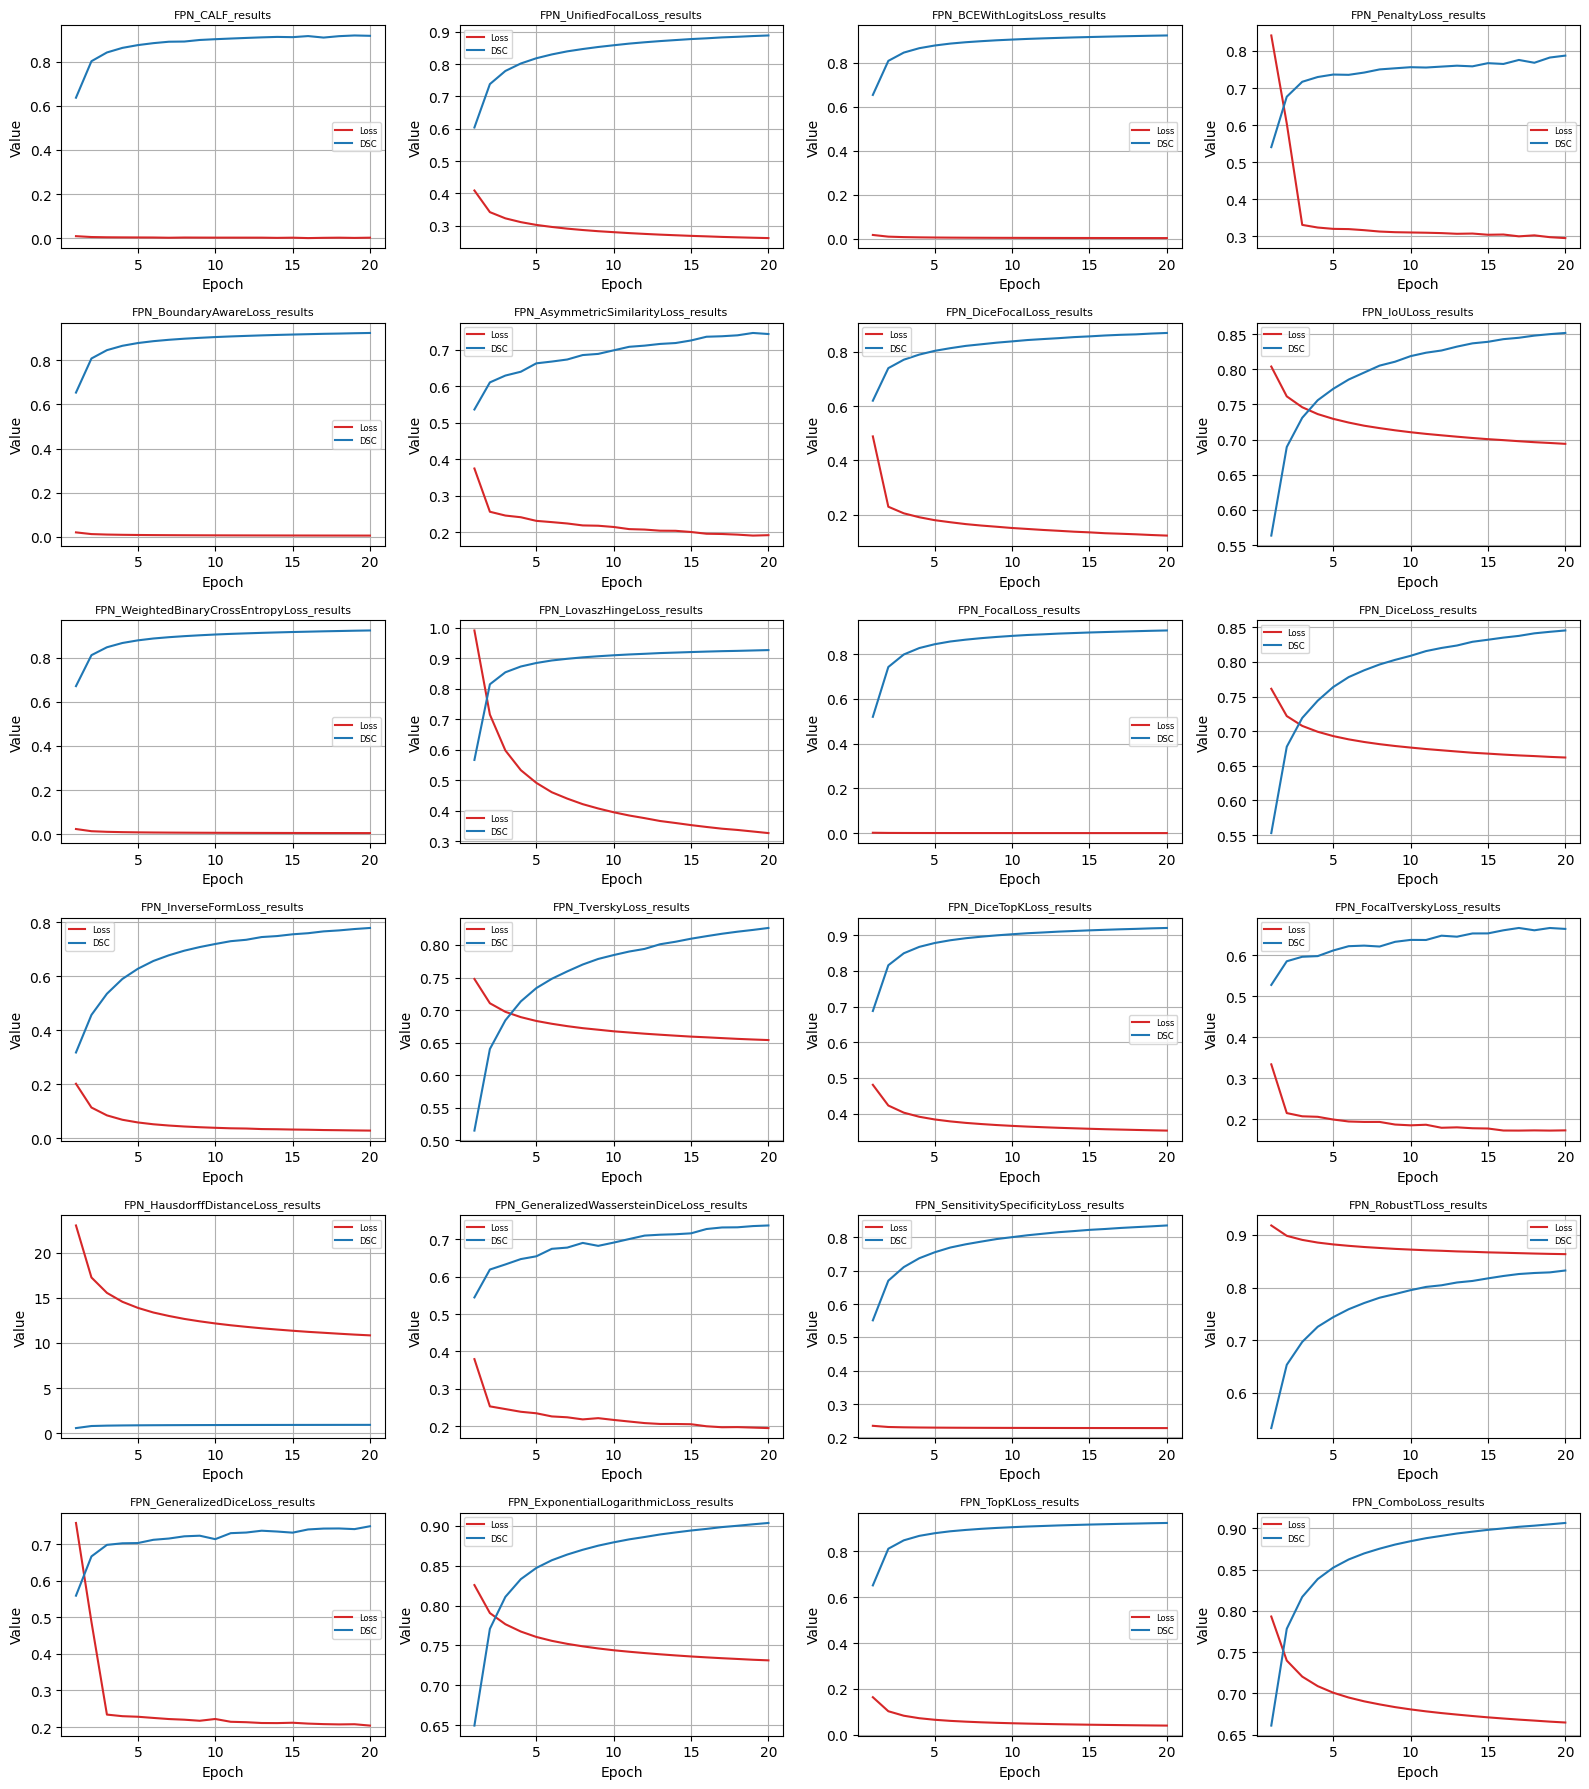

In [41]:
# Folder where all JSON files are located
folder_path = 'results'  # change this!

# List all JSON files
json_files = [f for f in os.listdir(folder_path) if f.endswith('.json')]

# Set up subplot grid (auto handles 24 plots in 4x6 or similar)
num_files = len(json_files)
cols = 4
rows = (num_files + cols - 1) // cols  # ceiling division

fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
axes = axes.flatten()  # Make it easier to index

# Loop through each file and plot
for idx, json_file in enumerate(json_files):
    file_path = os.path.join(folder_path, json_file)
    with open(file_path, 'r') as f:
        data = json.load(f)

    loss = data.get('loss_history', [])
    dsc = data.get('dsc_history', [])
    epochs = range(1, len(loss) + 1)

    ax = axes[idx]
    ax.plot(epochs, loss, label='Loss', color='tab:red', linewidth=1.5)
    ax.plot(epochs, dsc, label='DSC', color='tab:blue', linewidth=1.5)
    ax.set_title(json_file.replace('.json', ''), fontsize=8)
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Value')
    ax.grid(True)
    ax.legend(fontsize=6)

# Hide any extra subplots
for ax in axes[num_files:]:
    ax.axis('off')

# Layout
plt.tight_layout()
plt.show()